In [1]:
import pandas as pd
from bs4  import BeautifulSoup
import numpy as np

In [2]:
pub_soup = pd.read_csv('pub_soup.csv').drop(columns='Unnamed: 0').squeeze()
pub_soup2 = pd.read_csv('pub_soup2.csv').drop(columns='Unnamed: 0').squeeze()

In [3]:
# restaurant name
pub_name = []
for row in pub_soup:  # row contain 10 restaurants
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('.css-1egxyvc .css-1m051bw')
    for tag in result:
        # print(tag.text)
        pub_name.append(tag.text)



In [4]:
price_range_pub = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        price = header_text.select_one('.css-1s7bx9e')
        if price is not None:
            price_range_pub.append(price.text)
        else:
            price_range_pub.append(np.nan)


In [23]:
review_count_pub = []

for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        reviews = header_text.select_one('.reviewCount__09f24__tnBk4')
        if reviews is not None:
            review_count_pub.append(reviews.text)
        else:
            review_count_pub.append(np.nan)
review_count_nonan = pd.Series(review_count_pub).fillna(0)
review_count_nonan = [float(toint) for toint in review_count_pub]

[26.0,
 7.0,
 78.0,
 21.0,
 4.0,
 15.0,
 40.0,
 38.0,
 108.0,
 18.0,
 124.0,
 41.0,
 47.0,
 121.0,
 40.0,
 28.0,
 18.0,
 8.0,
 61.0,
 2.0,
 2.0,
 50.0,
 7.0,
 4.0,
 43.0,
 142.0,
 13.0,
 31.0,
 2.0,
 6.0,
 514.0,
 14.0,
 51.0,
 6.0,
 14.0,
 32.0,
 3.0,
 7.0,
 5.0,
 6.0,
 13.0,
 10.0,
 9.0,
 8.0,
 36.0,
 26.0,
 5.0,
 4.0,
 3.0,
 20.0,
 20.0,
 31.0,
 3.0,
 3.0,
 5.0,
 11.0,
 13.0,
 64.0,
 8.0,
 22.0,
 1.0,
 292.0,
 19.0,
 10.0,
 33.0,
 8.0,
 1.0,
 5.0,
 21.0,
 6.0,
 9.0,
 3.0,
 11.0,
 1.0,
 15.0,
 83.0,
 1.0,
 8.0,
 2.0,
 1.0,
 1.0,
 8.0,
 17.0,
 40.0,
 4.0,
 1.0,
 1.0,
 3.0,
 5.0,
 178.0,
 3.0,
 16.0,
 2.0,
 15.0,
 37.0,
 43.0,
 2.0,
 20.0,
 1.0,
 1.0,
 13.0,
 2.0,
 4.0,
 1.0,
 1.0,
 7.0,
 2.0,
 2.0,
 9.0,
 10.0,
 7.0,
 1.0,
 10.0,
 10.0,
 5.0,
 8.0,
 2.0,
 2.0,
 54.0,
 7.0,
 5.0,
 1.0,
 16.0,
 12.0,
 18.0,
 7.0,
 1.0,
 1.0,
 12.0,
 4.0,
 11.0,
 4.0,
 16.0,
 1.0,
 18.0,
 3.0,
 9.0,
 1.0,
 3.0,
 2.0,
 6.0,
 17.0,
 2.0,
 5.0,
 3.0,
 1.0,
 16.0,
 68.0,
 3.0,
 7.0,
 4.0,
 nan,
 20.0,
 9.0,


In [7]:
category_list = []

for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        category = header_text.select_one('.css-dd1rsv')
        if category is not None:
            category_list.append(category.text)
        else:
            category_list.append(np.nan)



In [8]:
neighbourhood_list = []
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        neighbourhood = header_text.select_one('.css-dzq7l1 .css-chan6m')
        if neighbourhood is not None:
            neighbourhood_list.append(neighbourhood.text)
        else:
            neighbourhood_list.append(np.nan)


In [9]:
rating = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rat = header_text.select_one('.overflow--hidden__09f24___ayzG')
        
        if rat is not None:
            rating.append(rat['aria-label'].split()[0])

            # print(rat['aria-label'])

        else:
            rating.append(np.nan)

rating = [float(toint) for toint in rating]


In [10]:

location = [] 
for row in pub_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('address .raw__09f24__T4Ezm')
    adress_elements = []
    for tag in result:
        adress_elements.append(tag.text)
    location.append( '--'.join(adress_elements) )




In [11]:
# .css-na3oda+ .css-1p9ibgf .css-1um3nx
website = []
for row in pub_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select_one('.css-na3oda+ .css-1p9ibgf .css-1um3nx')
    # for tag in result:
    if result is not None:
        website.append( result.text ) 

    else:
        website.append(np.nan)


In [12]:
df = pd.DataFrame(zip(pub_name, rating, review_count_pub, price_range_pub, category_list, neighbourhood_list, location, website), columns=("Pub names", "Rating", "Review count", "Price range", "Category", "Neighbourhood", "Location", "Website"))
df.to_csv("Pub full data.csv")

In [13]:
df

,Pub names,Rating,Review count,Price range,Category,Neighbourhood,Location,Website
0,Scobies Irish Pub,4.5,26,€,Irish Pub,L'Eixample,"Ronda de la Universidad, 8--08007 Barcelona--S...",http://scobiesirishpub.com/ind…
1,H1898 Rooftopbar,4.0,7,€€,Pubs,El Raval,"Les Rambles, 109--08002 Barcelona--Spain",http://www.hotel1898.com/es/
2,L’Ovella Negra,4.0,78,€,Pubs,El Raval,"Carrer de les Sitges, 5--08001 Barcelona--Spain",http://www.ovellanegra.com
3,Bobby’s Free,4.5,21,€,Pubs,L'Eixample,"Carrer de Pau Claris, 85--08010 Barcelona--Spain",http://www.bobbysfree.com/en/
4,Madame George,5.0,4,€,Lounges,Poblenou,"Carrer de Pujades, 179--08005 Barcelona--Spain",http://www.madamegeorgebar.com
...,...,...,...,...,...,...,...,...
227,Vic-Lor Scp,5.0,1,NaN,Pubs,Sant Martí,"Carrer Mozart , 18--08012 Barcelona--Spain",NaN
228,Bloomsday Literary Pub,2.5,2,NaN,Pubs,,"Calle Entença, 85--08015 Barcelona--Spain",NaN
229,Tripode,3.5,4,NaN,Pubs,"Sant Pere, Santa Caterina i la Ribera-Born",Calle Llull 159--08005 Barcelona--Spain,NaN
230,La Pubilla del Taulat,4.5,11,€€,Bars,Poblenou,"Carrer d'Espalter, 4--08001 Barcelona--Spain",http://www.sifo.es


<AxesSubplot:>

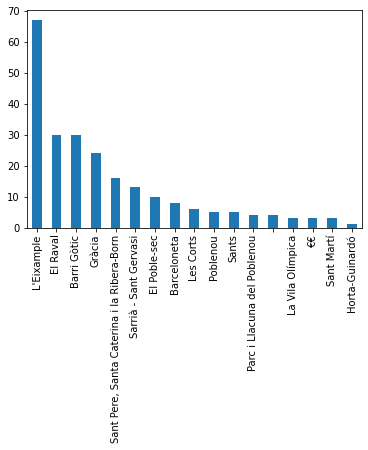

In [14]:
df['Neighbourhood'].value_counts().plot(kind='bar')

<AxesSubplot:>

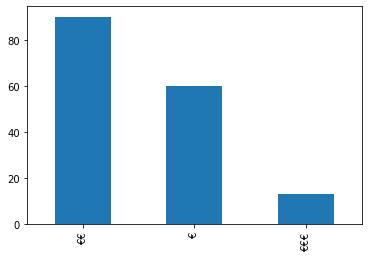

In [15]:
df['Price range'].value_counts().plot(kind='bar')

<AxesSubplot:>

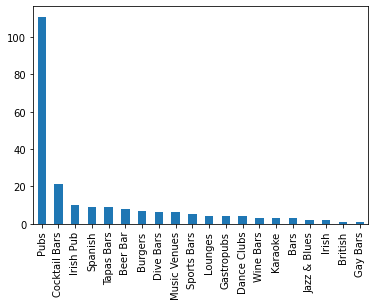

In [16]:
df['Category'].value_counts().nlargest(20).plot(kind='bar')

In [17]:
df['Review count'].plot(kind='hist', bins=20)


TypeError: no numeric data to plot